# Keras

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.callbacks import LearningRateScheduler as LRS
from keras.layers import Dense, Activation, Reshape
from keras.layers import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

## Constantes, Importar y normalizar datos

In [ ]:
batch_size = 100 # Tamaño del bacth (particiones en que se divide el conjunto de datos)
epochs = 75 ###MODIFICALE### Número de veces que se recorren todos los datos. Subirlo si accuracy en train no llega a 1, es decir, no se ha aprendido todo.
num_classes=10 # Para este caso, clasificar números del 0 al 9

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape) # 60.000 datos para train
print('test set', x_test.shape) # 10.000 datos para test

x_train = x_train.reshape(60000, 784) # Cada imagen de las 60.000 es de 28x28, en vez de matriz queremos un vector de 784x1. 
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # Para que la división de luego no de o 0 o 1.
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]. Antes teníamos valores de 0 a 255, despúes de 0 a 1, para que los números no se vayan de madre.
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes) # y son las etiquetas de clase(salida), x serán los vectores que representan cada imagen (entrada)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
training set (60000, 28, 28)
test set (10000, 28, 28)
60000 train samples
10000 test samples


## Básico

In [ ]:
# A three hidden layer of 1024
model = Sequential()
###MODIFICALE### Cambiar cantidad de parámetros? Cuantos más, mayor será el sobre entrenamiento (diferencia de accuracy en test y train)
###MODIFICALE### Cambiar funciones de activación
model.add(Dense(1024, activation='relu', input_shape=(784,))) # Primera capa densa de 1024 parámetros, con entrada de 784 como habíamos definido antes (el tamaño de cada imagen)
model.add(Dense(1024, activation='relu')) # Segunda capa densa de 1024 parámetros, función de activación relu
model.add(Dense(1024, activation='relu'))

model.add(Dense(num_classes, activation='softmax')) # Capa de salida, 10 clases con función de activación softmax

model.summary() # La primera capa tendrá 784x1024+1024 parámetros, 2ª 1024x1024+1024...

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Optimizer. Stochastic gradient descent.
sgd=SGD(learning_rate=0.01, decay=1e-6, momentum=0.9) # Factor de aprendizaje ###MODIFICALE### Si mejora muy lento, subirlo, si deja de mejorar o queda plano, bajarla.

In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
# Training
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
# Si el accuracy en test llega a 1, ya se lo ha aprendido todo. Si no llega, poner más epochs? o subir factor de aprendizaje?
# Si accuracy en test ya no mejora pero si en test, sobre entrenamiento.

Epoch 1/25
600/600 [==============================] - 7s 8ms/step - loss: 0.3646 - accuracy: 0.8971 - val_loss: 0.1754 - val_accuracy: 0.9481
Epoch 2/25
600/600 [==============================] - 4s 7ms/step - loss: 0.1376 - accuracy: 0.9598 - val_loss: 0.1085 - val_accuracy: 0.9666
Epoch 3/25
600/600 [==============================] - 4s 7ms/step - loss: 0.0914 - accuracy: 0.9728 - val_loss: 0.0876 - val_accuracy: 0.9727
Epoch 4/25
600/600 [==============================] - 4s 7ms/step - loss: 0.0658 - accuracy: 0.9807 - val_loss: 0.0754 - val_accuracy: 0.9757
Epoch 5/25
600/600 [==============================] - 4s 7ms/step - loss: 0.0502 - accuracy: 0.9854 - val_loss: 0.0723 - val_accuracy: 0.9764
Epoch 6/25
600/600 [==============================] - 4s 7ms/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0683 - val_accuracy: 0.9792
Epoch 7/25
600/600 [==============================] - 4s 7ms/step - loss: 0.0288 - accuracy: 0.9921 - val_loss: 0.0679 - val_accuracy: 0.9799
Epoch 

In [ ]:
# Evaluate over test
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06915003061294556
Test accuracy: 0.9825999736785889


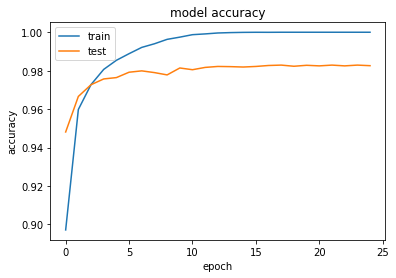

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Batchnorm (BN)




In [ ]:
## NN with BN
model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(BN())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 1024)             

In [ ]:
################################
# Note the higher learning rate
################################
sgd=SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/25
600/600 [==============================] - 7s 10ms/step - loss: 0.2340 - accuracy: 0.9386 - val_loss: 0.1094 - val_accuracy: 0.9697
Epoch 2/25
600/600 [==============================] - 6s 9ms/step - loss: 0.0820 - accuracy: 0.9751 - val_loss: 0.0958 - val_accuracy: 0.9727
Epoch 3/25
600/600 [==============================] - 6s 10ms/step - loss: 0.0546 - accuracy: 0.9833 - val_loss: 0.0718 - val_accuracy: 0.9795
Epoch 4/25
600/600 [==============================] - 6s 10ms/step - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0840 - val_accuracy: 0.9777
Epoch 5/25
600/600 [==============================] - 6s 9ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0677 - val_accuracy: 0.9824
Epoch 6/25
600/600 [==============================] - 6s 9ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0753 - val_accuracy: 0.9804
Epoch 7/25
600/600 [==============================] - 6s 10ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0705 - val_accuracy: 0.9821
Ep

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07963917404413223
Test accuracy: 0.9846000075340271


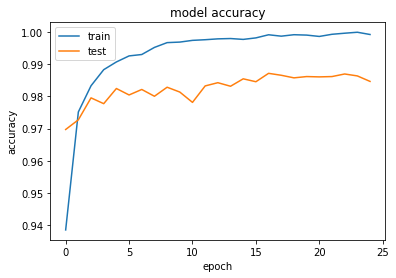

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Batchnorm y ruido gaussiano (BN GN)


In [ ]:
# NN with BN + Gaussian Noise
model = Sequential()
## noise in input 
model.add(Reshape(target_shape=(784,), input_shape=(784,))) # Esta realmente no hace falta, era para corregir errores anteriores.
model.add(GN(0.3))

model.add(Dense(1024, input_shape=(784,)))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 784)              0         
 se)                                                             
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 gaussian_noise_1 (GaussianN  (None, 1024)             0         
 oise)                                                           
                                                        

In [ ]:
sgd=SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/25
600/600 [==============================] - 9s 11ms/step - loss: 0.4101 - accuracy: 0.8908 - val_loss: 0.1442 - val_accuracy: 0.9581
Epoch 2/25
600/600 [==============================] - 6s 10ms/step - loss: 0.1933 - accuracy: 0.9419 - val_loss: 0.0985 - val_accuracy: 0.9686
Epoch 3/25
600/600 [==============================] - 6s 10ms/step - loss: 0.1560 - accuracy: 0.9530 - val_loss: 0.0820 - val_accuracy: 0.9736
Epoch 4/25
600/600 [==============================] - 6s 10ms/step - loss: 0.1281 - accuracy: 0.9603 - val_loss: 0.0626 - val_accuracy: 0.9806
Epoch 5/25
600/600 [==============================] - 6s 10ms/step - loss: 0.1048 - accuracy: 0.9668 - val_loss: 0.0654 - val_accuracy: 0.9808
Epoch 6/25
600/600 [==============================] - 6s 10ms/step - loss: 0.1013 - accuracy: 0.9675 - val_loss: 0.0554 - val_accuracy: 0.9828
Epoch 7/25
600/600 [==============================] - 6s 10ms/step - loss: 0.0923 - accuracy: 0.9700 - val_loss: 0.0515 - val_accuracy: 0.9835

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04152526333928108
Test accuracy: 0.989300012588501


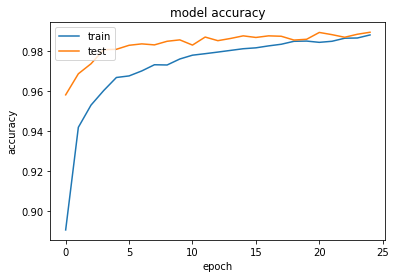

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Batchnorm, ruido gaussiano y planificador de factor de aprendizaje (BN GN LRS)


In [ ]:
# mismo modelo que antes
model = Sequential()
model.add(Reshape(target_shape=(784,), input_shape=(784,))) # Esta realmente no hace falta, era para corregir errores anteriores.
model.add(GN(0.3))
model.add(GN(0.3))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 784)              0         
 se)                                                             
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 gaussian_noise_1 (GaussianN  (None, 1024)             0         
 oise)                                                           
                                                        

In [ ]:
sgd=SGD(learning_rate=0.1, decay=0.0, momentum=0.0) # decay y momentum ahora a 0


In [ ]:
## define a learning rate scheduler. Esto es lo nuevo respecto al anterior, y que le ponemos más epochs.
def scheduler(epoch):
    if epoch < 25:
        return .1
    elif epoch < 50:
        return 0.01
    else:
        return 0.001

set_lr = LRS(scheduler)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
## Training, note the callbacks list
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[set_lr]) # añadimos el scheduler

Epoch 1/75
600/600 [==============================] - 8s 9ms/step - loss: 0.3537 - accuracy: 0.8881 - val_loss: 0.1215 - val_accuracy: 0.9619 - lr: 0.1000
Epoch 2/75
600/600 [==============================] - 5s 9ms/step - loss: 0.1916 - accuracy: 0.9400 - val_loss: 0.1000 - val_accuracy: 0.9687 - lr: 0.1000
Epoch 3/75
600/600 [==============================] - 5s 9ms/step - loss: 0.1532 - accuracy: 0.9511 - val_loss: 0.0696 - val_accuracy: 0.9778 - lr: 0.1000
Epoch 4/75
600/600 [==============================] - 6s 9ms/step - loss: 0.1288 - accuracy: 0.9577 - val_loss: 0.0698 - val_accuracy: 0.9780 - lr: 0.1000
Epoch 5/75
600/600 [==============================] - 5s 9ms/step - loss: 0.1152 - accuracy: 0.9621 - val_loss: 0.0622 - val_accuracy: 0.9795 - lr: 0.1000
Epoch 6/75
600/600 [==============================] - 6s 9ms/step - loss: 0.1042 - accuracy: 0.9656 - val_loss: 0.0604 - val_accuracy: 0.9800 - lr: 0.1000
Epoch 7/75
600/600 [==============================] - 6s 9ms/step - lo

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03731356933712959
Test accuracy: 0.9883999824523926


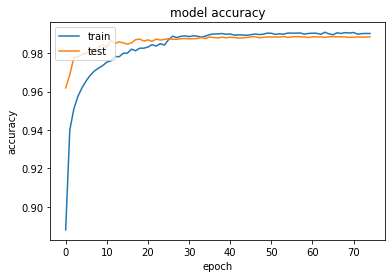

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Batchnorm, ruido gaussiano, planificador de factor de aprendizaje y data augmentation (BN GN LRS DA)

In [ ]:
# Inicialización de variables es distinta con data augmentation
batch_size = 100
num_classes = 10
epochs = 75

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


print(x_train.shape)

# Mandatory to use ImageDataGenerator, it expects 4D Tensors
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

(60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
## Data Augmentation with an ImageGenerator
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    #Añadimos zoom y rotación, en grados
    zoom_range = 0.2,
    rotation_range = 3, # en grados
    # cambiar la perspectiva
    shear_range = 0.1 
    )

In [ ]:
## Model, note the reshape
model = Sequential()
model.add(Reshape(target_shape=(784,), input_shape=(28,28,1)))
model.add(GN(0.3))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 784)               0         
                                                                 
 gaussian_noise_20 (Gaussian  (None, 784)              0         
 Noise)                                                          
                                                                 
 dense_20 (Dense)            (None, 1024)              803840    
                                                                 
 batch_normalization_15 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 gaussian_noise_21 (Gaussian  (None, 1024)             0         
 Noise)                                                          
                                                      

In [ ]:
# Definimos varios optimizadores. Parece que SGD va mejor
sgd=SGD(learning_rate=0.1, decay=0.0, momentum=0.0)
adam=Adam(learning_rate=0.1)

In [ ]:
def scheduler(epoch):
    if epoch < 25:
        return .1
    elif epoch < 50:
        return 0.01
    else:
        return 0.001

set_lr = LRS(scheduler)
# Otra alternativa al planificador del factor de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [ ]:
model.compile(loss='categorical_crossentropy',
              # optimizador, cambiamos de sgd a adam
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
# Esto es diferente con data augmentation
history=model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=len(x_train) / batch_size, 
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            callbacks=[reduce_lr],
                            verbose=1)

Epoch 1/75
600/600 [==============================] - 30s 48ms/step - loss: 0.7563 - accuracy: 0.7536 - val_loss: 0.1441 - val_accuracy: 0.9530 - lr: 0.1000
Epoch 2/75
600/600 [==============================] - 29s 48ms/step - loss: 0.4161 - accuracy: 0.8651 - val_loss: 0.1171 - val_accuracy: 0.9618 - lr: 0.1000
Epoch 3/75
600/600 [==============================] - 30s 50ms/step - loss: 0.3426 - accuracy: 0.8902 - val_loss: 0.0823 - val_accuracy: 0.9729 - lr: 0.1000
Epoch 4/75
600/600 [==============================] - 29s 48ms/step - loss: 0.3089 - accuracy: 0.9012 - val_loss: 0.0740 - val_accuracy: 0.9759 - lr: 0.1000
Epoch 5/75
600/600 [==============================] - 29s 49ms/step - loss: 0.2797 - accuracy: 0.9094 - val_loss: 0.0707 - val_accuracy: 0.9743 - lr: 0.1000
Epoch 6/75
600/600 [==============================] - 29s 48ms/step - loss: 0.2630 - accuracy: 0.9161 - val_loss: 0.0637 - val_accuracy: 0.9791 - lr: 0.1000
Epoch 7/75
600/600 [==============================] - 29s 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.021337077021598816
Test accuracy: 0.9927999973297119


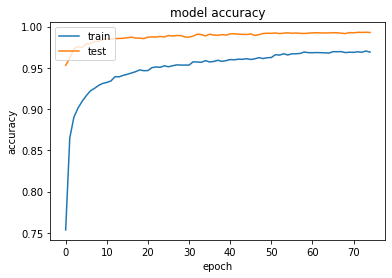

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# PyTorch

In [ ]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

import matplotlib.pyplot as plt

## Constantes, Importar datos (normalización en el train y test)

In [ ]:
# Constants definition
batch_size = 100 # Tamaño del bacth (particiones en que se divide el conjunto de datos)
epochs = 75 ###MODIFICALE### Número de veces que se recorren todos los datos. Subirlo si accuracy en train no llega a 1, es decir, no se ha aprendido todo.
num_classes = 10 # Para este caso, clasificar números del 0 al 9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Creating dataloaders
# ToTensor() - Converts a Image (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
data_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_set = torchvision.datasets.MNIST('.data/', train=True, download=True, transform=data_transforms)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

test_set = torchvision.datasets.MNIST('.data/', train=False, download=True, transform=data_transforms)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

# Statistics printing
x_batch, y_batch = iter(train_loader).next()
print("Training set: {} samples - Max value: {} - Min value: {}".format(len(train_loader.dataset),
                                                                        x_batch.max(), x_batch.min()))
x_batch, y_batch = iter(test_loader).next()
print("Test set: {} samples - Max value: {} - Min value: {}".format(len(test_loader.dataset),
                                                                    x_batch.max(), x_batch.min()))
print("Example batch shape: {}".format(x_batch.shape))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/train-images-idx3-ubyte.gz to .data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/train-labels-idx1-ubyte.gz to .data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/t10k-images-idx3-ubyte.gz to .data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/t10k-labels-idx1-ubyte.gz to .data/MNIST/raw

Training set: 60000 samples - Max value: 1.0 - Min value: 0.0
Test set: 10000 samples - Max value: 1.0 - Min value: 0.0
Example batch shape: torch.Size([100, 1, 28, 28])


In [ ]:
for inputs, targets in train_loader:
  print('inputs: ', inputs)
  print('targets: ', targets)

## Básico

In [ ]:
# Creating our Neural Network - Fully Connected
###MODIFICALE### Cambiar cantidad de parámetros? Cuantos más, mayor será el sobre entrenamiento (diferencia de accuracy en test y train)
###MODIFICALE### Cambiar funciones de activación
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(784, 1024)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(1024, 1024)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(1024, 1024)
        self.relu3 = nn.ReLU()
        self.classifier = nn.Linear(1024, num_classes) 
        # Activación softmax? Más adelante, al definir la loss (criterion) como CrossEntropyLoss, esto hace LogSoftmax y NLLLoss(Negative Log Likehood loss) a la vez
        #self.softmax = nn.LogSoftmax(dim=1) # Dimensión sobre la que aplicar el softmax (columas 0 o filas 1)

    def forward(self, x):
        out = self.relu1(self.linear1(x))
        out = self.relu2(self.linear2(out))
        out = self.relu3(self.linear3(out))
        out = self.classifier(out)
        #out = self.softmax(self.classifier(out))
        return out

In [ ]:
# Instantiating the network and printing its architecture
net = Net().to(device)
print(net)
# bias significa si se usa el parámetro b, sumar

Net(
  (linear1): Linear(in_features=784, out_features=1024, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (relu3): ReLU()
  (classifier): Linear(in_features=1024, out_features=10, bias=True)
)


In [ ]:
# Training hyperparameters. SGD = stochastich gradient descent
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, weight_decay=1e-6, momentum=0.9) # Factor de aprendizaje ###MODIFICALE### Si mejora muy lento, subirlo, si deja de mejorar o queda plano, bajarla.

In [ ]:
# Crear listas para imprimir luego
train_accuracys = []
test_accuracys = []
# Start training
print("\n---- Start Training ----")
best_accuracy = -1
for epoch in range(epochs):

    # TRAIN THE NETWORK
    train_loss, train_correct = 0, 0
    net.train()
    for inputs, targets in train_loader:
        # data is a list of [inputs, labels]
        inputs, targets = inputs.to(device), targets.to(device)
        # care! net expect a 784 size vector and our dataset provide 1x28x28 (channels, height, width) -> Reshape!. De batches con 100 1x28x28 a   784
        inputs = inputs.view(inputs.size(0), -1) # redimensionar a view(columnas, filas). -1 cuando no sabemos cuantas filas habrá, pero sí el nº de columnas. Pasamos de 100 batches de 1x28x28 a 100 batches de 784

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        _, pred = outputs.max(1)  # get the index of the max log-probability
        train_correct += pred.eq(targets).sum().item()

        # print statistics
        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)

    # TEST NETWORK
    net.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            # care! net expect a 784 size vector and our dataset provide 1x28x28 (channels, height, width) -> Reshape!. De 100 batches de 1x28x28 a 100 batches de 784
            inputs = inputs.view(inputs.size(0), -1) # redimensionar a view(columnas, filas). -1 cuando no sabemos cuantas filas habrá, pero sí el nº de columnas. Pasamos de 100x1x28x28 a 100x784
            outputs = net(inputs)
            test_loss += criterion(outputs, targets)
            _, pred = outputs.max(1)  # get the index of the max log-probability
            correct += pred.eq(targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print("[Epoch {}] Train Loss: {:.6f} - Test Loss: {:.6f} - Train Accuracy: {:.2f}% - Test Accuracy: {:.2f}%".format(
        epoch + 1, train_loss, test_loss, 100. * train_correct / len(train_loader.dataset), test_accuracy
    ))
    train_accuracys.append(100. * train_correct / len(train_loader.dataset))
    test_accuracys.append(test_accuracy)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy

print("Finished Training")
print("Best Test accuracy: {:.2f}%".format(best_accuracy))


---- Start Training ----
[Epoch 1] Train Loss: 0.007223 - Test Loss: 0.002623 - Train Accuracy: 80.05% - Test Accuracy: 92.21%
[Epoch 2] Train Loss: 0.002014 - Test Loss: 0.001506 - Train Accuracy: 94.01% - Test Accuracy: 95.37%
[Epoch 3] Train Loss: 0.001301 - Test Loss: 0.001134 - Train Accuracy: 96.13% - Test Accuracy: 96.44%
[Epoch 4] Train Loss: 0.000939 - Test Loss: 0.001133 - Train Accuracy: 97.21% - Test Accuracy: 96.26%
[Epoch 5] Train Loss: 0.000701 - Test Loss: 0.000878 - Train Accuracy: 97.87% - Test Accuracy: 97.16%
[Epoch 6] Train Loss: 0.000561 - Test Loss: 0.000739 - Train Accuracy: 98.28% - Test Accuracy: 97.75%
[Epoch 7] Train Loss: 0.000428 - Test Loss: 0.000733 - Train Accuracy: 98.71% - Test Accuracy: 97.68%
[Epoch 8] Train Loss: 0.000348 - Test Loss: 0.000662 - Train Accuracy: 98.95% - Test Accuracy: 97.81%
[Epoch 9] Train Loss: 0.000273 - Test Loss: 0.000646 - Train Accuracy: 99.23% - Test Accuracy: 97.93%
[Epoch 10] Train Loss: 0.000209 - Test Loss: 0.000652 - 

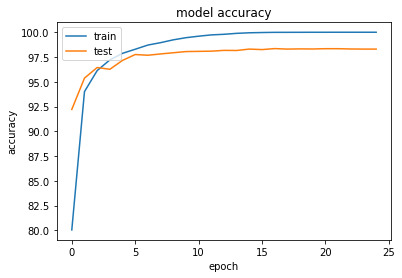

In [ ]:
plt.plot(train_accuracys)
plt.plot(test_accuracys)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Batchnorm (bn)


In [ ]:
# Creating our Neural Network - Fully Connected
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(784, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(1024, 1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(1024, 1024)
        self.bn3 = nn.BatchNorm1d(1024)
        self.relu3 = nn.ReLU()
        self.classifier = nn.Linear(1024, num_classes)

    def forward(self, x):
        out = self.relu1(self.bn1(self.linear1(x)))
        out = self.relu2(self.bn2(self.linear2(out)))
        out = self.relu3(self.bn3(self.linear3(out)))
        out = self.classifier(out)
        return out

In [ ]:
# Instantiating the network and printing its architecture
net = Net().to(device)
print(net)

Net(
  (linear1): Linear(in_features=784, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (classifier): Linear(in_features=1024, out_features=10, bias=True)
)


In [ ]:
# Training hyperparameters
# Factor de aprendizaje más alto que en básico
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, weight_decay=1e-6, momentum=0.9)

In [ ]:
# Crear listas para imprimir luego
train_accuracys = []
test_accuracys = []
# Start training
print("\n---- Start Training ----")
best_accuracy = -1
for epoch in range(epochs):

    # TRAIN THE NETWORK
    train_loss, train_correct = 0, 0
    net.train()
    for inputs, targets in train_loader:
        # data is a list of [inputs, labels]
        inputs, targets = inputs.to(device), targets.to(device)
        # care! net expect a 784 size vector and our dataset provide 1x28x28 (channels, height, width) -> Reshape!
        inputs = inputs.view(inputs.size(0), -1)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        _, pred = outputs.max(1)  # get the index of the max log-probability
        train_correct += pred.eq(targets).sum().item()

        # print statistics
        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)

    # TEST NETWORK
    net.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            # care! net expect a 784 size vector and our dataset provide 1x28x28 (channels, height, width) -> Reshape!
            inputs = inputs.view(inputs.size(0), -1)
            outputs = net(inputs)
            test_loss += criterion(outputs, targets)
            _, pred = outputs.max(1)  # get the index of the max log-probability
            correct += pred.eq(targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print("[Epoch {}] Train Loss: {:.6f} - Test Loss: {:.6f} - Train Accuracy: {:.2f}% - Test Accuracy: {:.2f}%".format(
        epoch + 1, train_loss, test_loss, 100. * train_correct / len(train_loader.dataset), test_accuracy
    ))

    train_accuracys.append(100. * train_correct / len(train_loader.dataset))
    test_accuracys.append(test_accuracy)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy

print("Finished Training")
print("Best Test accuracy: {:.2f}%".format(best_accuracy))


---- Start Training ----
[Epoch 1] Train Loss: 0.002452 - Test Loss: 0.001161 - Train Accuracy: 93.40% - Test Accuracy: 96.61%
[Epoch 2] Train Loss: 0.000943 - Test Loss: 0.000839 - Train Accuracy: 97.19% - Test Accuracy: 97.79%
[Epoch 3] Train Loss: 0.000633 - Test Loss: 0.000741 - Train Accuracy: 98.05% - Test Accuracy: 97.83%
[Epoch 4] Train Loss: 0.000458 - Test Loss: 0.000676 - Train Accuracy: 98.57% - Test Accuracy: 98.12%
[Epoch 5] Train Loss: 0.000371 - Test Loss: 0.000765 - Train Accuracy: 98.80% - Test Accuracy: 98.08%
[Epoch 6] Train Loss: 0.000272 - Test Loss: 0.000708 - Train Accuracy: 99.11% - Test Accuracy: 98.23%
[Epoch 7] Train Loss: 0.000215 - Test Loss: 0.000650 - Train Accuracy: 99.31% - Test Accuracy: 98.45%
[Epoch 8] Train Loss: 0.000184 - Test Loss: 0.000645 - Train Accuracy: 99.39% - Test Accuracy: 98.49%
[Epoch 9] Train Loss: 0.000178 - Test Loss: 0.000750 - Train Accuracy: 99.43% - Test Accuracy: 98.44%
[Epoch 10] Train Loss: 0.000170 - Test Loss: 0.000676 - 

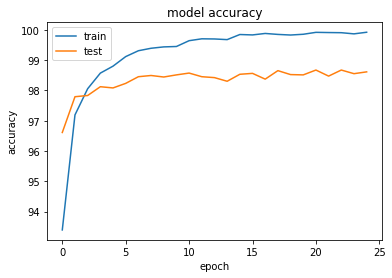

In [ ]:
plt.plot(train_accuracys)
plt.plot(test_accuracys)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Batchnorm y ruido gaussiano (BN GN)

In [ ]:
# There are no GaussianNoise Layer in Pytorch
# https://discuss.pytorch.org/t/writing-a-simple-gaussian-noise-layer-in-pytorch/4694/4
class GaussianNoise(nn.Module):
    """Gaussian noise regularizer.
    Args:
        sigma (float, optional): relative standard deviation used to generate the
            noise. Relative means that it will be multiplied by the magnitude of
            the value your are adding the noise to. This means that sigma can be
            the same regardless of the scale of the vector.
        is_relative_detach (bool, optional): whether to detach the variable before
            computing the scale of the noise. If `False` then the scale of the noise
            won't be seen as a constant but something to optimize: this will bias the
            network to generate vectors with smaller values.
    """

    def __init__(self, sigma=0.1, is_relative_detach=True):
        super().__init__()
        self.sigma = sigma
        self.is_relative_detach = is_relative_detach
        self.noise = torch.tensor(0).to(device).float()

    def forward(self, x):
        if self.training and self.sigma != 0:
            scale = self.sigma * x.detach() if self.is_relative_detach else self.sigma * x
            sampled_noise = self.noise.repeat(*x.size()).normal_() * scale
            x = x + sampled_noise
        return x


In [ ]:
# Creating our Neural Network - Fully Connected
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.gn0 = GaussianNoise(0.3)
        self.linear1 = nn.Linear(784, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.gn1 = GaussianNoise(0.3)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(1024, 1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.gn2 = GaussianNoise(0.3)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(1024, 1024)
        self.bn3 = nn.BatchNorm1d(1024)
        self.gn3 = GaussianNoise(0.3)
        self.relu3 = nn.ReLU()
        self.classifier = nn.Linear(1024, num_classes)

    def forward(self, x):
        out = self.gn0(x)
        out = self.relu1(self.gn1(self.bn1(self.linear1(out))))
        out = self.relu2(self.gn2(self.bn2(self.linear2(out))))
        out = self.relu3(self.gn3(self.bn3(self.linear3(out))))
        out = self.classifier(out)
        return out

In [ ]:
# Instantiating the network and printing its architecture
net = Net().to(device)
print(net)

Net(
  (gn0): GaussianNoise()
  (linear1): Linear(in_features=784, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gn1): GaussianNoise()
  (relu1): ReLU()
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gn2): GaussianNoise()
  (relu2): ReLU()
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gn3): GaussianNoise()
  (relu3): ReLU()
  (classifier): Linear(in_features=1024, out_features=10, bias=True)
)


In [ ]:
# Training hyperparameters
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, weight_decay=1e-6, momentum=0.9)

In [ ]:
# Crear listas para imprimir luego
train_accuracys = []
test_accuracys = []
# Start training
print("\n---- Start Training ----")
best_accuracy = -1
for epoch in range(epochs):

    # TRAIN THE NETWORK
    train_loss, train_correct = 0, 0
    net.train()
    for inputs, targets in train_loader:
        # data is a list of [inputs, labels]
        inputs, targets = inputs.to(device), targets.to(device)
        # care! net expect a 784 size vector and our dataset provide 1x28x28 (channels, height, width) -> Reshape!
        inputs = inputs.view(inputs.size(0), -1)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        _, pred = outputs.max(1)  # get the index of the max log-probability
        train_correct += pred.eq(targets).sum().item()

        # print statistics
        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)

    # TEST NETWORK
    net.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            # care! net expect a 784 size vector and our dataset provide 1x28x28 (channels, height, width) -> Reshape!
            inputs = inputs.view(inputs.size(0), -1)
            outputs = net(inputs)
            test_loss += criterion(outputs, targets)
            _, pred = outputs.max(1)  # get the index of the max log-probability
            correct += pred.eq(targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print("[Epoch {}] Train Loss: {:.6f} - Test Loss: {:.6f} - Train Accuracy: {:.2f}% - Test Accuracy: {:.2f}%".format(
        epoch + 1, train_loss, test_loss, 100. * train_correct / len(train_loader.dataset), test_accuracy
    ))

    train_accuracys.append(100. * train_correct / len(train_loader.dataset))
    test_accuracys.append(test_accuracy)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy

print("Finished Training")
print("Best Test accuracy: {:.2f}%".format(best_accuracy))


---- Start Training ----
[Epoch 1] Train Loss: 0.002810 - Test Loss: 0.000943 - Train Accuracy: 92.52% - Test Accuracy: 97.12%
[Epoch 2] Train Loss: 0.001167 - Test Loss: 0.000903 - Train Accuracy: 96.64% - Test Accuracy: 97.48%
[Epoch 3] Train Loss: 0.000794 - Test Loss: 0.000823 - Train Accuracy: 97.61% - Test Accuracy: 97.61%
[Epoch 4] Train Loss: 0.000688 - Test Loss: 0.000714 - Train Accuracy: 97.89% - Test Accuracy: 98.01%
[Epoch 5] Train Loss: 0.000531 - Test Loss: 0.000682 - Train Accuracy: 98.33% - Test Accuracy: 98.03%
[Epoch 6] Train Loss: 0.000456 - Test Loss: 0.000630 - Train Accuracy: 98.55% - Test Accuracy: 98.25%
[Epoch 7] Train Loss: 0.000409 - Test Loss: 0.000624 - Train Accuracy: 98.69% - Test Accuracy: 98.36%
[Epoch 8] Train Loss: 0.000348 - Test Loss: 0.000619 - Train Accuracy: 98.90% - Test Accuracy: 98.33%
[Epoch 9] Train Loss: 0.000306 - Test Loss: 0.000674 - Train Accuracy: 98.98% - Test Accuracy: 98.38%
[Epoch 10] Train Loss: 0.000263 - Test Loss: 0.000591 - 

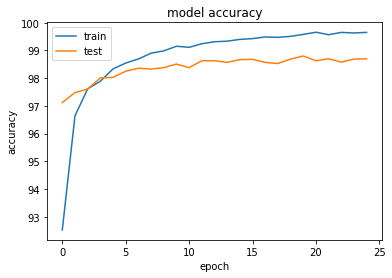

In [ ]:
plt.plot(train_accuracys)
plt.plot(test_accuracys)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Batchnorm, ruido gaussiano y planificador de factor de aprendizaje (BN GN LRS)

In [ ]:
# There are no GaussianNoise Layer in Pytorch
# https://discuss.pytorch.org/t/writing-a-simple-gaussian-noise-layer-in-pytorch/4694/4
class GaussianNoise(nn.Module):
    """Gaussian noise regularizer.
    Args:
        sigma (float, optional): relative standard deviation used to generate the
            noise. Relative means that it will be multiplied by the magnitude of
            the value your are adding the noise to. This means that sigma can be
            the same regardless of the scale of the vector.
        is_relative_detach (bool, optional): whether to detach the variable before
            computing the scale of the noise. If `False` then the scale of the noise
            won't be seen as a constant but something to optimize: this will bias the
            network to generate vectors with smaller values.
    """

    def __init__(self, sigma=0.1, is_relative_detach=True):
        super().__init__()
        self.sigma = sigma
        self.is_relative_detach = is_relative_detach
        self.noise = torch.tensor(0).to(device).float()

    def forward(self, x):
        if self.training and self.sigma != 0:
            scale = self.sigma * x.detach() if self.is_relative_detach else self.sigma * x
            sampled_noise = self.noise.repeat(*x.size()).normal_() * scale
            x = x + sampled_noise
        return x

In [ ]:
# Creating our Neural Network - Fully Connected. Igual que la anterior
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.gn0 = GaussianNoise(0.3)
        self.linear1 = nn.Linear(784, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.gn1 = GaussianNoise(0.3)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(1024, 1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.gn2 = GaussianNoise(0.3)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(1024, 1024)
        self.bn3 = nn.BatchNorm1d(1024)
        self.gn3 = GaussianNoise(0.3)
        self.relu3 = nn.ReLU()
        self.classifier = nn.Linear(1024, num_classes)

    def forward(self, x):
        out = self.gn0(x)
        out = self.relu1(self.gn1(self.bn1(self.linear1(out))))
        out = self.relu2(self.gn2(self.bn2(self.linear2(out))))
        out = self.relu3(self.gn3(self.bn3(self.linear3(out))))
        out = self.classifier(out)
        return out

In [ ]:
# Instantiating the network and printing its architecture
net = Net().to(device)
print(net)

Net(
  (gn0): GaussianNoise()
  (linear1): Linear(in_features=784, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gn1): GaussianNoise()
  (relu1): ReLU()
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gn2): GaussianNoise()
  (relu2): ReLU()
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gn3): GaussianNoise()
  (relu3): ReLU()
  (classifier): Linear(in_features=1024, out_features=10, bias=True)
)


In [ ]:
# Training hyperparameters
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1) # ahora no ponemos ni momentum ni decay

In [ ]:
# Learning Rate Annealing (LRA) scheduling
# lr = 0.1     if epoch < 25
# lr = 0.01    if 30 <= epoch < 50
# lr = 0.001   if epoch >= 50
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50], gamma=0.1)

In [ ]:
# Crear listas para imprimir luego
train_accuracys = []
test_accuracys = []
# Start training
print("\n---- Start Training ----")
best_accuracy = -1
for epoch in range(epochs):

    # TRAIN THE NETWORK
    train_loss, train_correct = 0, 0
    net.train()
    for inputs, targets in train_loader:
        # data is a list of [inputs, labels]
        inputs, targets = inputs.to(device), targets.to(device)
        # care! net expect a 784 size vector and our dataset provide 1x28x28 (channels, height, width) -> Reshape!
        inputs = inputs.view(inputs.size(0), -1)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        _, pred = outputs.max(1)  # get the index of the max log-probability
        train_correct += pred.eq(targets).sum().item()

        # print statistics
        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)

    # TEST NETWORK
    net.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            # care! net expect a 784 size vector and our dataset provide 1x28x28 (channels, height, width) -> Reshape!
            inputs = inputs.view(inputs.size(0), -1)
            outputs = net(inputs)
            test_loss += criterion(outputs, targets)
            _, pred = outputs.max(1)  # get the index of the max log-probability
            correct += pred.eq(targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    # Get current learning rate via the optimizer
    for param_group in optimizer.param_groups:
        current_lr = param_group['lr']

    print("[Epoch {}] LR: {:.3f} - Train Loss: {:.5f} - Test Loss: {:.5f} - Train Accuracy: {:.2f}% - Test Accuracy: {:.2f}%".format(
            epoch + 1, current_lr, train_loss, test_loss, 100. * train_correct / len(train_loader.dataset), test_accuracy
        ))

    train_accuracys.append(100. * train_correct / len(train_loader.dataset))
    test_accuracys.append(test_accuracy)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy

    scheduler.step()

print("Finished Training")
print("Best Test accuracy: {:.2f}".format(best_accuracy))


---- Start Training ----
[Epoch 1] LR: 0.100 - Train Loss: 0.00199 - Test Loss: 0.00088 - Train Accuracy: 93.80% - Test Accuracy: 97.13%
[Epoch 2] LR: 0.100 - Train Loss: 0.00088 - Test Loss: 0.00063 - Train Accuracy: 97.19% - Test Accuracy: 97.99%
[Epoch 3] LR: 0.100 - Train Loss: 0.00059 - Test Loss: 0.00057 - Train Accuracy: 98.05% - Test Accuracy: 98.18%
[Epoch 4] LR: 0.100 - Train Loss: 0.00047 - Test Loss: 0.00061 - Train Accuracy: 98.42% - Test Accuracy: 97.91%
[Epoch 5] LR: 0.100 - Train Loss: 0.00039 - Test Loss: 0.00059 - Train Accuracy: 98.75% - Test Accuracy: 98.07%
[Epoch 6] LR: 0.100 - Train Loss: 0.00031 - Test Loss: 0.00054 - Train Accuracy: 98.99% - Test Accuracy: 98.37%
[Epoch 7] LR: 0.100 - Train Loss: 0.00028 - Test Loss: 0.00051 - Train Accuracy: 99.11% - Test Accuracy: 98.42%
[Epoch 8] LR: 0.100 - Train Loss: 0.00024 - Test Loss: 0.00051 - Train Accuracy: 99.21% - Test Accuracy: 98.38%
[Epoch 9] LR: 0.100 - Train Loss: 0.00022 - Test Loss: 0.00054 - Train Accurac

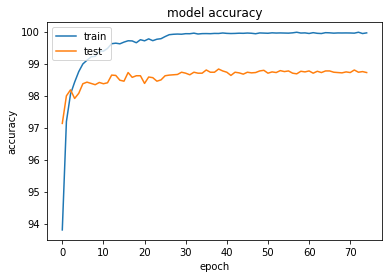

In [ ]:
plt.plot(train_accuracys)
plt.plot(test_accuracys)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Batchnorm, ruido gaussiano, planificador de factor de aprendizaje y data augmentation (BN GN LRS DA)

In [ ]:
# Constants definition. Aplicar data augmentation.
batch_size = 100
epochs = 75
num_classes = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Creating dataloaders
# ToTensor() - Converts a Image (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
# APPLY SOME DATA AUGMENTATIONS -> HorizontalFLips + Translations + Rotations
# Para estar igual que en keras, añadiríamos zoom
train_transforms = torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(p=0.0),
                                                   torchvision.transforms.RandomAffine(degrees=3, translate=(0.1, 0.1)),
                                                   torchvision.transforms.ToTensor()])

train_set = torchvision.datasets.MNIST('.data/', train=True, download=True, transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

test_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

test_set = torchvision.datasets.MNIST('.data/', train=False, download=True, transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

# Statistics printing
x_batch, y_batch = iter(train_loader).next()
print("Training set: {} samples - Max value: {} - Min value: {}".format(len(train_loader.dataset),
                                                                        x_batch.max(), x_batch.min()))
x_batch, y_batch = iter(test_loader).next()
print("Test set: {} samples - Max value: {} - Min value: {}".format(len(test_loader.dataset),
                                                                    x_batch.max(), x_batch.min()))
print("Example batch shape: {}".format(x_batch.shape))

Training set: 60000 samples - Max value: 1.0 - Min value: 0.0
Test set: 10000 samples - Max value: 1.0 - Min value: 0.0
Example batch shape: torch.Size([100, 1, 28, 28])


In [ ]:
# There are no GaussianNoise Layer in Pytorch
# https://discuss.pytorch.org/t/writing-a-simple-gaussian-noise-layer-in-pytorch/4694/4
class GaussianNoise(nn.Module):
    """Gaussian noise regularizer.
    Args:
        sigma (float, optional): relative standard deviation used to generate the
            noise. Relative means that it will be multiplied by the magnitude of
            the value your are adding the noise to. This means that sigma can be
            the same regardless of the scale of the vector.
        is_relative_detach (bool, optional): whether to detach the variable before
            computing the scale of the noise. If `False` then the scale of the noise
            won't be seen as a constant but something to optimize: this will bias the
            network to generate vectors with smaller values.
    """

    def __init__(self, sigma=0.1, is_relative_detach=True):
        super().__init__()
        self.sigma = sigma
        self.is_relative_detach = is_relative_detach
        self.noise = torch.tensor(0).to(device).float()

    def forward(self, x):
        if self.training and self.sigma != 0:
            scale = self.sigma * x.detach() if self.is_relative_detach else self.sigma * x
            sampled_noise = self.noise.repeat(*x.size()).normal_() * scale
            x = x + sampled_noise
        return x

In [ ]:
# Creating our Neural Network - Fully Connected
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.gn0 = GaussianNoise(0.3)
        self.linear1 = nn.Linear(784, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.gn1 = GaussianNoise(0.3)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(1024, 1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.gn2 = GaussianNoise(0.3)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(1024, 1024)
        self.bn3 = nn.BatchNorm1d(1024)
        self.gn3 = GaussianNoise(0.3)
        self.relu3 = nn.ReLU()
        self.classifier = nn.Linear(1024, num_classes)

    def forward(self, x):
        out = self.gn0(x)
        out = self.relu1(self.gn1(self.bn1(self.linear1(out))))
        out = self.relu2(self.gn2(self.bn2(self.linear2(out))))
        out = self.relu3(self.gn3(self.bn3(self.linear3(out))))
        out = self.classifier(out)
        return out

In [ ]:
# Instantiating the network and printing its architecture
net = Net().to(device)
print(net)

Net(
  (gn0): GaussianNoise()
  (linear1): Linear(in_features=784, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gn1): GaussianNoise()
  (relu1): ReLU()
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gn2): GaussianNoise()
  (relu2): ReLU()
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gn3): GaussianNoise()
  (relu3): ReLU()
  (classifier): Linear(in_features=1024, out_features=10, bias=True)
)


In [ ]:
# Training hyperparameters
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)
# Podríamos usar Adam en lugar de SGD

In [ ]:
# Learning Rate Annealing (LRA) scheduling
# lr = 0.1     if epoch < 25
# lr = 0.01    if 30 <= epoch < 50
# lr = 0.001   if epoch >= 50
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50], gamma=0.1)

In [ ]:
# Crear listas para imprimir luego
train_accuracys = []
test_accuracys = []
# Start training
print("\n---- Start Training ----")
best_accuracy = -1
for epoch in range(epochs):

    # TRAIN THE NETWORK
    train_loss, train_correct = 0, 0
    net.train()
    for inputs, targets in train_loader:
        # data is a list of [inputs, labels]
        inputs, targets = inputs.to(device), targets.to(device)
        # care! net expect a 784 size vector and our dataset provide 1x28x28 (channels, height, width) -> Reshape!
        inputs = inputs.view(inputs.size(0), -1)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        _, pred = outputs.max(1)  # get the index of the max log-probability
        train_correct += pred.eq(targets).sum().item()

        # print statistics
        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)

    # TEST NETWORK
    net.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            # care! net expect a 784 size vector and our dataset provide 1x28x28 (channels, height, width) -> Reshape!
            inputs = inputs.view(inputs.size(0), -1)
            outputs = net(inputs)
            test_loss += criterion(outputs, targets)
            _, pred = outputs.max(1)  # get the index of the max log-probability
            correct += pred.eq(targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    # Get current learning rate via the optimizer
    for param_group in optimizer.param_groups:
        current_lr = param_group['lr']

    print("[Epoch {}] LR: {:.3f} - Train Loss: {:.5f} - Test Loss: {:.5f} - Train Accuracy: {:.2f}% - Test Accuracy: {:.2f}%".format(
            epoch + 1, current_lr, train_loss, test_loss, 100. * train_correct / len(train_loader.dataset), test_accuracy
        ))

    train_accuracys.append(100. * train_correct / len(train_loader.dataset))
    test_accuracys.append(test_accuracy)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy

    scheduler.step()

print("Finished Training")
print("Best Test accuracy: {:.2f}".format(best_accuracy))


---- Start Training ----
[Epoch 1] LR: 0.100 - Train Loss: 0.00382 - Test Loss: 0.00112 - Train Accuracy: 87.69% - Test Accuracy: 96.52%
[Epoch 2] LR: 0.100 - Train Loss: 0.00190 - Test Loss: 0.00074 - Train Accuracy: 94.04% - Test Accuracy: 97.58%
[Epoch 3] LR: 0.100 - Train Loss: 0.00154 - Test Loss: 0.00057 - Train Accuracy: 95.21% - Test Accuracy: 98.08%
[Epoch 4] LR: 0.100 - Train Loss: 0.00129 - Test Loss: 0.00058 - Train Accuracy: 95.95% - Test Accuracy: 98.10%
[Epoch 5] LR: 0.100 - Train Loss: 0.00119 - Test Loss: 0.00052 - Train Accuracy: 96.22% - Test Accuracy: 98.25%
[Epoch 6] LR: 0.100 - Train Loss: 0.00107 - Test Loss: 0.00054 - Train Accuracy: 96.57% - Test Accuracy: 98.23%
[Epoch 7] LR: 0.100 - Train Loss: 0.00100 - Test Loss: 0.00047 - Train Accuracy: 96.87% - Test Accuracy: 98.44%
[Epoch 8] LR: 0.100 - Train Loss: 0.00096 - Test Loss: 0.00039 - Train Accuracy: 96.93% - Test Accuracy: 98.62%
[Epoch 9] LR: 0.100 - Train Loss: 0.00088 - Test Loss: 0.00039 - Train Accurac

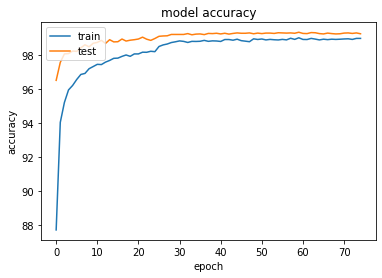

In [ ]:
plt.plot(train_accuracys)
plt.plot(test_accuracys)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()